In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_excel("Linear Regression.xlsx",sheet_name=0)
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


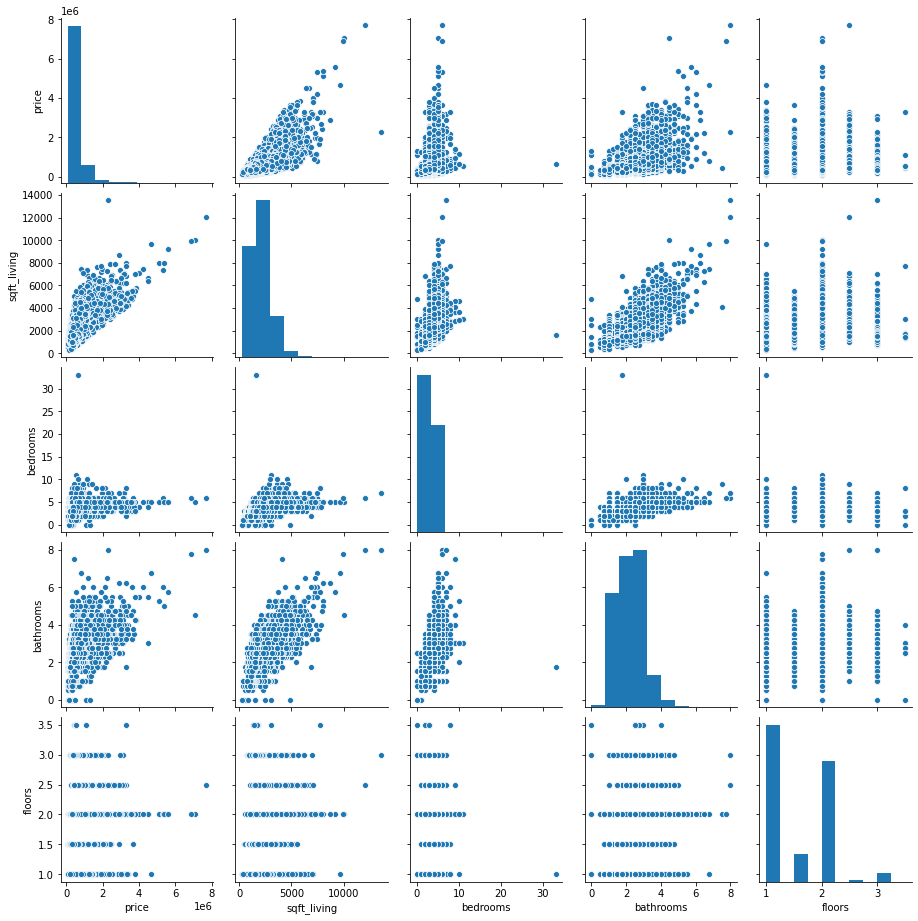

In [4]:
sns.pairplot(data)

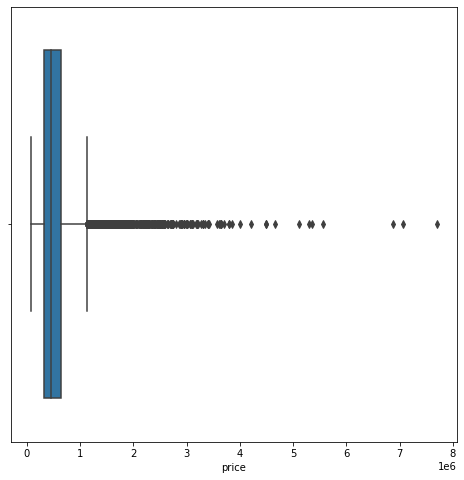

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data['price'],ax=ax)

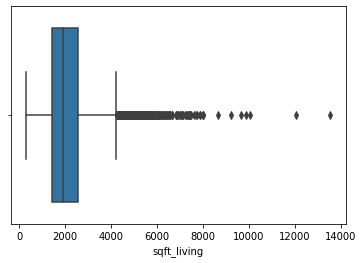

In [6]:
sns.boxplot(data['sqft_living'])

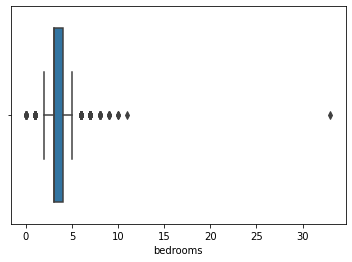

In [7]:
sns.boxplot(data['bedrooms'])

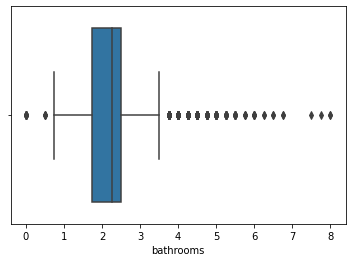

In [8]:
sns.boxplot(data['bathrooms'])

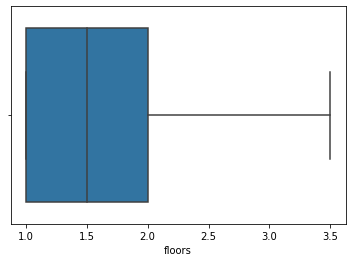

In [9]:
sns.boxplot(data['floors'])

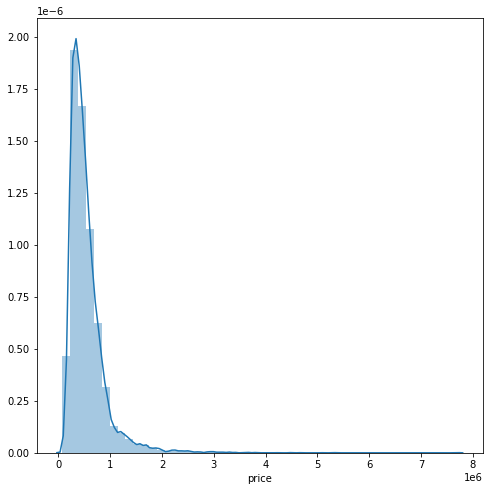

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.price,ax=ax)

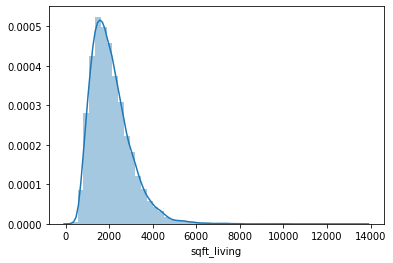

In [11]:
sns.distplot(data.sqft_living)

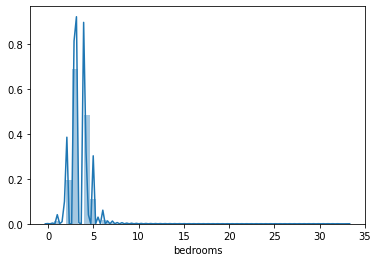

In [12]:

sns.distplot(data.bedrooms)

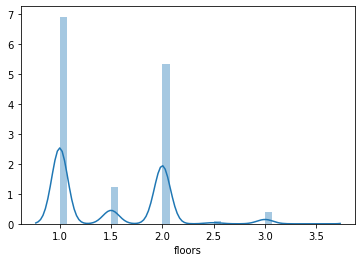

In [13]:
sns.distplot(data.floors)



###**Data Visualization Inferences**

1) The dependent variable price is unimodal,left skewed and has many outliers.

2) The independent variable area of living in square feet is unimodal,left skewed and has many outliers.

3) The independent variable number of bedrooms is multimodal and has moderate outliers.

4) The independent variable number of bathrooms is multimodal and has moderate outliers.

5) The independent variable number of floors is multimodal and has no outliers.

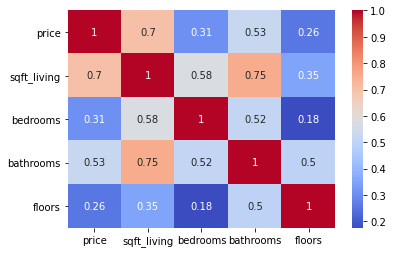

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

###**Model 1**

Price as dependent variable and area of living in square feet as independent variable. Since both the variables are continuous a simple linear regression model is used.

Splitting the dataset into training and testing data

In [15]:
y=data.iloc[:,:1]
y.head()


,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [16]:
x=data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

###**Training the model**

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [19]:

lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###**Testing the model**

In [20]:
ypred=lin_reg.predict(x_test)
ypred

array([[ 360116.30918286],
       [1261900.99730684],
       [ 362899.59525731],
       ...,
       [ 560512.90654374],
       [ 374032.73955514],
       [ 329500.16236383]])

###**Calculating performance metrics of the model**

In [21]:

from sklearn.metrics import r2_score,mean_squared_error
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("Root mean square error is......",RMSE)
print("r square value is......",r_square)

Root mean square error is...... 264896.2296616816
r square value is...... 0.488899283822523


###**Model 2**

**Splitting the dataset into training and testing data**

In [22]:
x1=data.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [23]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.3,random_state=1)

**Training the model**

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg1=LinearRegression()

In [25]:
lin_reg1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing the model**



In [26]:
y_pred1=lin_reg1.predict(x1_test)
y_pred1

array([[609985.5089382 ],
       [495500.22465829],
       [381014.94037837],
       ...,
       [381014.94037837],
       [724470.79321811],
       [609985.5089382 ]])


**Calculating performance metrics of the model**

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R-Square value is.......",r2_score(y1_test,y_pred1))
print("The RMSE value is.......",np.sqrt(mean_squared_error(y1_test,y_pred1)))

The R-Square value is....... 0.10047870759700972
The RMSE value is....... 374684.6359495245


###**Inferences**

1) R-square value is 0.10 suggesting that only about 10% of the variance in the target variable i.e. price can be explained by the independent variable number of bedrooms.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).

###**Not a good regression fit**